In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('features.csv')
df3=pd.read_csv('stores.csv')

In [231]:
print(df1.head(3))

print('\n')
print(df2.head(3))

print('\n')
print(df3.head(3))

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False


   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  


   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392


In [232]:
print(df1.shape)
print(df2.shape)
print(df3.shape)


(421570, 5)
(8190, 12)
(45, 3)


In [233]:
df=df1.merge(df2,how='left').merge(df3,how='left')

In [234]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [235]:
df.shape

(421570, 16)

In [236]:
# simple explianation with how use left merge
cd={'A':[1,2,3],'B':[20,30,40]}
cd1={'ZZ':[120,330,400,4000,5000],'A':[1,2,4,30,50]}

cd=pd.DataFrame(cd)
cd1=pd.DataFrame(cd1)

In [237]:
cd

,A,B
0,1,20
1,2,30
2,3,40


In [238]:
cd1

,ZZ,A
0,120,1
1,330,2
2,400,4
3,4000,30
4,5000,50


In [239]:
cd.merge(cd1,how='left')

,A,B,ZZ
0,1,20,120.0
1,2,30,330.0
2,3,40,NaN


In [240]:
cd.merge(cd1,how='right')

,A,B,ZZ
0,1,20.0,120
1,2,30.0,330
2,4,NaN,400
3,30,NaN,4000
4,50,NaN,5000


In [241]:
cd.merge(cd1)

,A,B,ZZ
0,1,20,120
1,2,30,330


In [242]:
## data contains nearly 5lakhs rowns so for processing speed we take 5000 samples

data=df.sample(50000)

In [243]:
data.shape

(50000, 16)

## EDA

In [244]:
%%time
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 170581 to 348731
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         50000 non-null  int64  
 1   Dept          50000 non-null  int64  
 2   Date          50000 non-null  object 
 3   Weekly_Sales  50000 non-null  float64
 4   IsHoliday     50000 non-null  bool   
 5   Temperature   50000 non-null  float64
 6   Fuel_Price    50000 non-null  float64
 7   MarkDown1     17950 non-null  float64
 8   MarkDown2     13314 non-null  float64
 9   MarkDown3     16361 non-null  float64
 10  MarkDown4     16069 non-null  float64
 11  MarkDown5     18045 non-null  float64
 12  CPI           50000 non-null  float64
 13  Unemployment  50000 non-null  float64
 14  Type          50000 non-null  object 
 15  Size          50000 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 6.2+ MB
CPU times: user 22.6 ms, sys: 7.6 ms, t

In [245]:
%%time
import pandas_profiling

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 16.9 µs


In [246]:
 pip install pandas-profiling 

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [247]:
# find null values

data.isna().sum()

Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1       32050
MarkDown2       36686
MarkDown3       33639
MarkDown4       33931
MarkDown5       31955
CPI                 0
Unemployment        0
Type                0
Size                0
dtype: int64

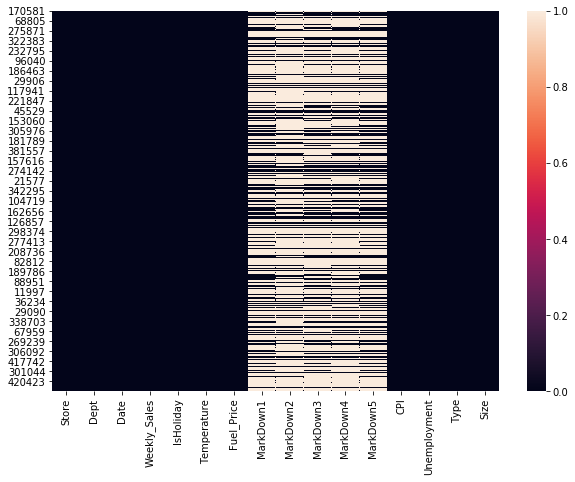

In [248]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isna())
plt.show()

In [249]:
## single variable analayis

data['Store'][:10]

170581    18
387488    41
309191    32
280399    29
380918    40
340776    36
25717      3
50044      6
278658    29
386892    41
Name: Store, dtype: int64

In [250]:
data['Store'].value_counts(ascending=True)

36     736
33     800
43     806
30     827
38     845
44     853
37     855
42     857
3     1063
5     1066
35    1085
22    1092
29    1107
9     1110
16    1115
25    1123
17    1142
14    1143
12    1144
26    1147
11    1153
39    1159
15    1164
7     1166
23    1167
18    1167
40    1182
41    1183
21    1195
27    1195
20    1196
6     1196
24    1197
1     1203
28    1206
4     1213
8     1214
19    1221
32    1227
45    1233
34    1236
2     1242
31    1250
10    1258
13    1261
Name: Store, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


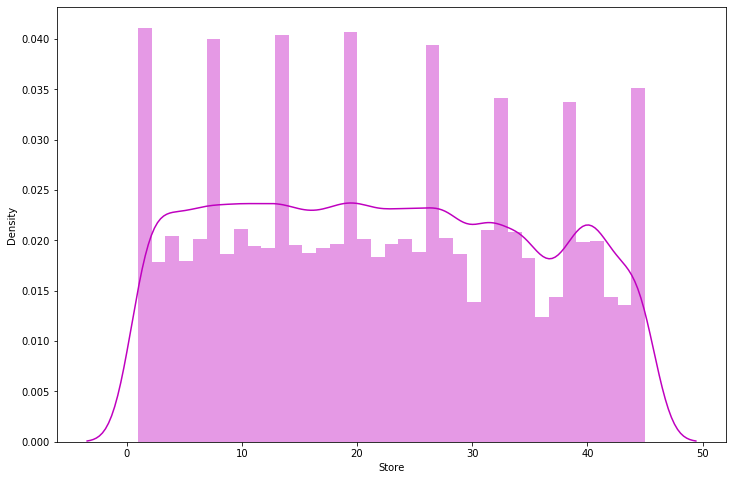

In [251]:
plt.figure(figsize=(12,8))
sns.distplot(data['Store'],color='m')
plt.show()

In [252]:
data['Dept'].value_counts(ascending=False)

21    821
2     796
82    788
7     788
81    787
     ... 
78     28
65     17
77     13
43      4
39      2
Name: Dept, Length: 81, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


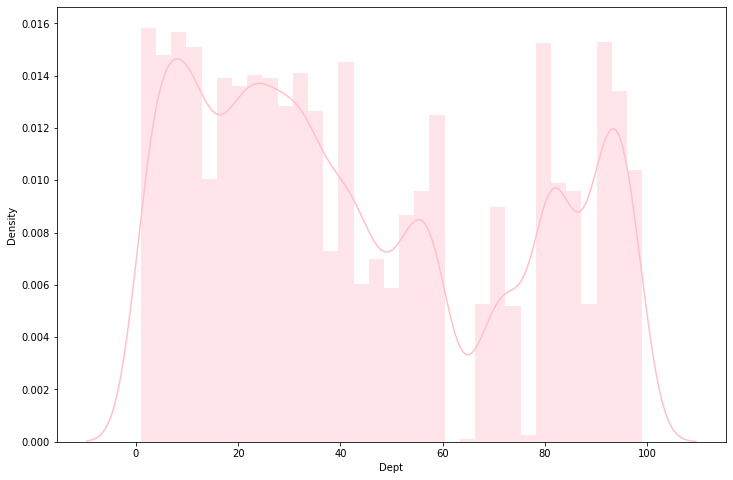

In [253]:
plt.figure(figsize=(12,8))
sns.distplot(data['Dept'],color='pink')
plt.show()

In [254]:
data['Weekly_Sales'].value_counts()

10.00      40
15.00      37
5.00       31
10.47      29
20.00      25
           ..
811.36      1
619.64      1
2055.70     1
5031.09     1
258.18      1
Name: Weekly_Sales, Length: 47328, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


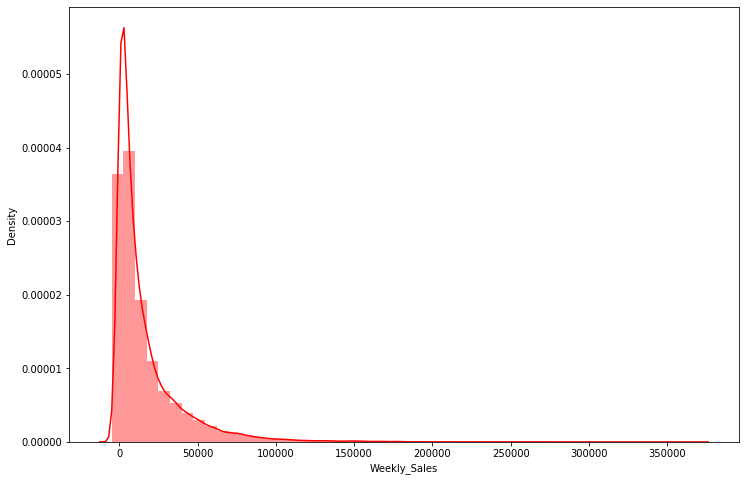

In [255]:
plt.figure(figsize=(12,8))
sns.distplot(data['Weekly_Sales'],color='red')
plt.show()

In [256]:
data['IsHoliday'].value_counts(normalize=True)

False    0.92954
True     0.07046
Name: IsHoliday, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


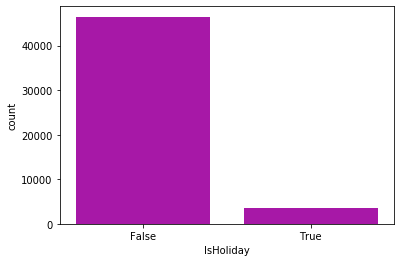

In [257]:
sns.countplot(data['IsHoliday'],color='m')
plt.show()

In [258]:
data['Temperature'][:10]

170581    70.92
387488    34.99
309191    74.20
280399    40.58
380918    64.42
340776    67.31
25717     72.05
50044     63.71
278658    73.30
386892    37.21
Name: Temperature, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


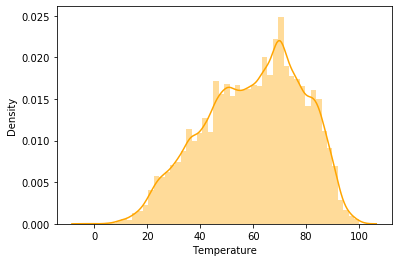

In [259]:
sns.distplot(data['Temperature'],color='orange')
plt.show()

In [260]:
data['Fuel_Price'][0:10]

170581    3.629
387488    3.232
309191    3.542
280399    3.633
380918    3.577
340776    3.529
25717     3.877
50044     3.787
278658    3.921
386892    3.095
Name: Fuel_Price, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


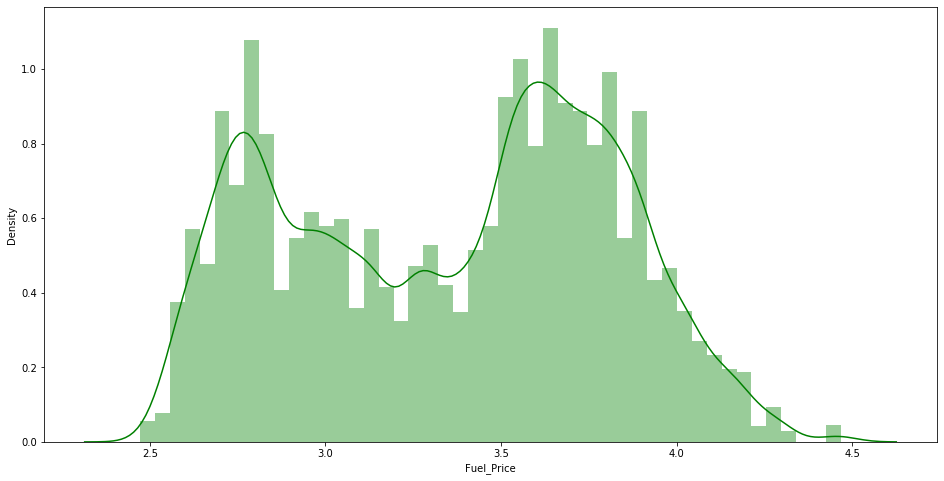

In [261]:
plt.figure(figsize=(16,8))
sns.distplot(data['Fuel_Price'],color='green')
plt.show()

In [262]:
data['CPI'][:10]

170581    138.162900
387488    192.011600
309191    194.110502
280399    137.063258
380918    138.196267
340776    213.577670
25717     225.068954
50044     222.893083
278658    138.472936
386892    196.545831
Name: CPI, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


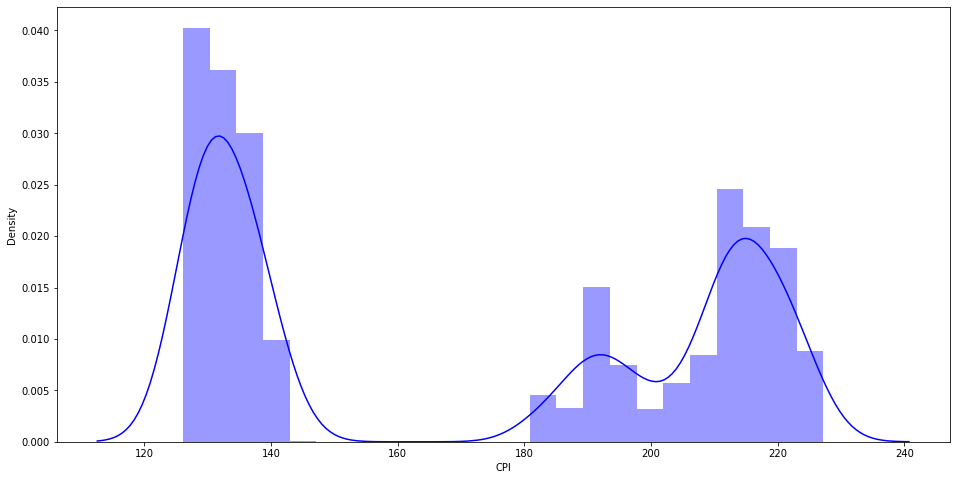

In [263]:
plt.figure(figsize=(16,8))
sns.distplot(data['CPI'],color='b')

In [264]:
data['Unemployment'][:10]

170581    8.304
387488    7.241
309191    8.622
280399    8.988
380918    4.125
340776    8.300
25717     6.664
50044     6.132
278658    9.419
386892    6.589
Name: Unemployment, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


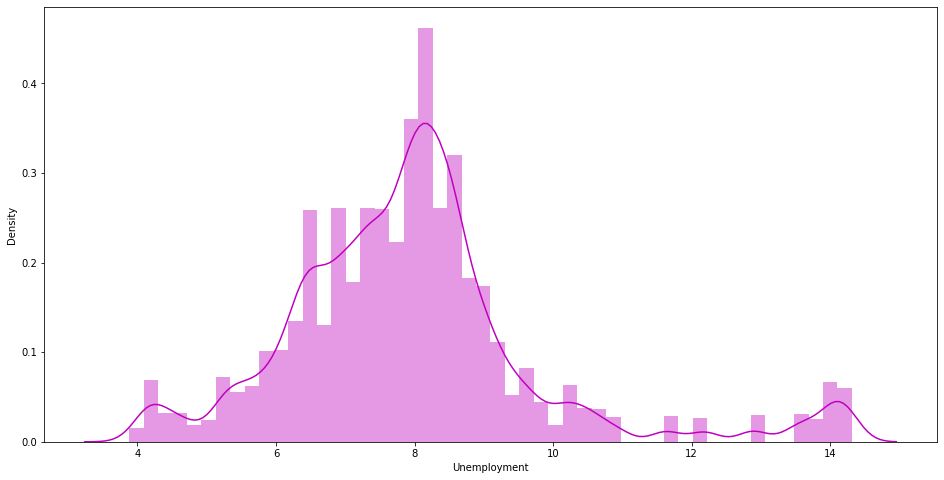

In [265]:
plt.figure(figsize=(16,8))
sns.distplot(data['Unemployment'],color='m')

In [266]:
data['Type'][:3]

170581    B
387488    A
309191    A
Name: Type, dtype: object

In [267]:
data['Type'].value_counts(normalize=True)


A    0.51120
B    0.38794
C    0.10086
Name: Type, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


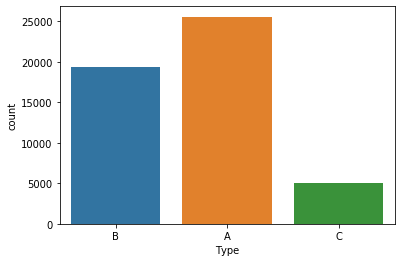

In [268]:
sns.countplot(data['Type'])

In [269]:
data['Size'][:10]

170581    120653
387488    196321
309191    203007
280399     93638
380918    155083
340776     39910
25717      37392
50044     202505
278658     93638
386892    196321
Name: Size, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


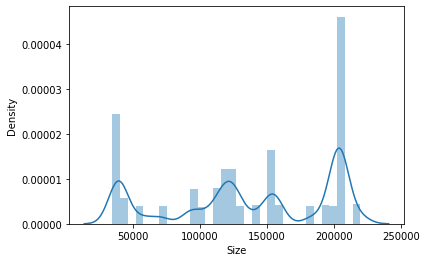

In [270]:
sns.distplot(data['Size'])

## export the dataset

In [271]:
data.to_csv('walmart_50k.csv',index=False)
df=pd.read_csv('walmart_50k.csv')

In [272]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,18,24,2012-06-22,7159.74,False,70.92,3.629,8206.82,478.09,1.37,3726.43,4323.55,138.162900,8.304,B,120653
1,41,55,2011-03-04,8948.70,False,34.99,3.232,NaN,NaN,NaN,NaN,NaN,192.011600,7.241,A,196321
2,32,40,2011-08-12,58443.56,False,74.20,3.542,NaN,NaN,NaN,NaN,NaN,194.110502,8.622,A,203007
3,29,25,2012-02-03,5243.29,False,40.58,3.633,23656.27,2347.13,110.26,11641.23,2548.96,137.063258,8.988,B,93638
4,40,98,2012-06-29,7691.08,False,64.42,3.577,2925.88,253.20,NaN,400.00,2124.37,138.196267,4.125,A,155083


In [273]:
%time
df.info()

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11.9 µs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         50000 non-null  int64  
 1   Dept          50000 non-null  int64  
 2   Date          50000 non-null  object 
 3   Weekly_Sales  50000 non-null  float64
 4   IsHoliday     50000 non-null  bool   
 5   Temperature   50000 non-null  float64
 6   Fuel_Price    50000 non-null  float64
 7   MarkDown1     17950 non-null  float64
 8   MarkDown2     13314 non-null  float64
 9   MarkDown3     16361 non-null  float64
 10  MarkDown4     16069 non-null  float64
 11  MarkDown5     18045 non-null  float64
 12  CPI           50000 non-null  float64
 13  Unemployment  50000 non-null  float64
 14  Type          50000 non-null  object 
 15  Size          50000 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)

## correlation

In [274]:
corr_matrix=df.corr()

In [275]:
corr_matrix

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.023247,-0.084292,0.003670,-0.044561,0.070210,-0.116281,-0.031633,-0.039482,-0.014740,-0.020404,-0.210148,0.211306,-0.183328
Dept,0.023247,1.000000,0.152208,0.004559,0.007110,0.004373,0.007243,0.010049,-0.001713,0.010374,-0.000579,-0.007272,0.007416,-0.004806
Weekly_Sales,-0.084292,0.152208,1.000000,0.007133,0.000525,-0.001855,0.088638,0.031991,0.041824,0.046656,0.080280,-0.014692,-0.029628,0.244659
IsHoliday,0.003670,0.004559,0.007133,1.000000,-0.150866,-0.076682,-0.028980,0.325382,0.418083,0.005114,-0.053788,0.000575,0.011703,0.004586
Temperature,-0.044561,0.007110,0.000525,-0.150866,1.000000,0.143326,-0.040047,-0.324885,-0.094289,-0.075265,-0.002064,0.183623,0.100969,-0.059416
Fuel_Price,0.070210,0.004373,-0.001855,-0.076682,0.143326,1.000000,0.038898,-0.215938,-0.091588,-0.062505,-0.130119,-0.162026,-0.036047,0.003868
MarkDown1,-0.116281,0.007243,0.088638,-0.028980,-0.040047,0.038898,1.000000,0.024942,-0.105028,0.824026,0.146607,-0.041876,0.041729,0.349634
MarkDown2,-0.031633,0.010049,0.031991,0.325382,-0.324885,-0.215938,0.024942,1.000000,-0.049672,-0.006000,-0.008844,-0.047043,0.029983,0.096713
MarkDown3,-0.039482,-0.001713,0.041824,0.418083,-0.094289,-0.091588,-0.105028,-0.049672,1.000000,-0.068878,-0.028991,-0.033238,0.016375,0.057419
MarkDown4,-0.014740,0.010374,0.046656,0.005114,-0.075265,-0.062505,0.824026,-0.006000,-0.068878,1.000000,0.095252,-0.043879,0.017506,0.182330


In [276]:
# Weekly_Sales is a dependent features
corr_df=corr_matrix['Weekly_Sales'].sort_values(ascending=False)
corr_df


Weekly_Sales    1.000000
Size            0.244659
Dept            0.152208
MarkDown1       0.088638
MarkDown5       0.080280
MarkDown4       0.046656
MarkDown3       0.041824
MarkDown2       0.031991
IsHoliday       0.007133
Temperature     0.000525
Fuel_Price     -0.001855
CPI            -0.014692
Unemployment   -0.029628
Store          -0.084292
Name: Weekly_Sales, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


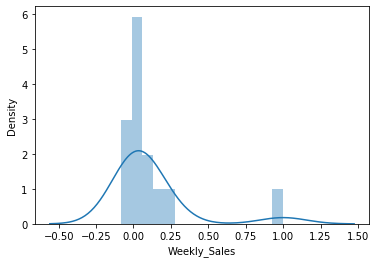

In [277]:
sns.distplot(corr_df)

## handiling categerical values

In [278]:
bool(0)

False

In [279]:
bool(1)

True

In [280]:
def convert_holiday(x):
    if x==True:
        return 1
    else:
        return 0

In [281]:
df['IsHoliday']=df['IsHoliday'].apply(convert_holiday)

In [282]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,18,24,2012-06-22,7159.74,0,70.92,3.629,8206.82,478.09,1.37,3726.43,4323.55,138.162900,8.304,B,120653
1,41,55,2011-03-04,8948.70,0,34.99,3.232,NaN,NaN,NaN,NaN,NaN,192.011600,7.241,A,196321
2,32,40,2011-08-12,58443.56,0,74.20,3.542,NaN,NaN,NaN,NaN,NaN,194.110502,8.622,A,203007
3,29,25,2012-02-03,5243.29,0,40.58,3.633,23656.27,2347.13,110.26,11641.23,2548.96,137.063258,8.988,B,93638
4,40,98,2012-06-29,7691.08,0,64.42,3.577,2925.88,253.20,NaN,400.00,2124.37,138.196267,4.125,A,155083


## Type

In [283]:
df['Type'].value_counts()

A    25560
B    19397
C     5043
Name: Type, dtype: int64

In [284]:
type_df=pd.get_dummies(df['Type'],drop_first=True,prefix='Type')

In [285]:
type_df.head()

,Type_B,Type_C
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0


In [286]:
df=pd.concat([df,type_df],axis=1)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Type_B,Type_C
0,18,24,2012-06-22,7159.74,0,70.92,3.629,8206.82,478.09,1.37,3726.43,4323.55,138.162900,8.304,B,120653,1,0
1,41,55,2011-03-04,8948.70,0,34.99,3.232,NaN,NaN,NaN,NaN,NaN,192.011600,7.241,A,196321,0,0
2,32,40,2011-08-12,58443.56,0,74.20,3.542,NaN,NaN,NaN,NaN,NaN,194.110502,8.622,A,203007,0,0
3,29,25,2012-02-03,5243.29,0,40.58,3.633,23656.27,2347.13,110.26,11641.23,2548.96,137.063258,8.988,B,93638,1,0
4,40,98,2012-06-29,7691.08,0,64.42,3.577,2925.88,253.20,NaN,400.00,2124.37,138.196267,4.125,A,155083,0,0


In [287]:
df.drop('Type',axis=1,inplace=True)

In [288]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_B,Type_C
0,18,24,2012-06-22,7159.74,0,70.92,3.629,8206.82,478.09,1.37,3726.43,4323.55,138.162900,8.304,120653,1,0
1,41,55,2011-03-04,8948.70,0,34.99,3.232,NaN,NaN,NaN,NaN,NaN,192.011600,7.241,196321,0,0
2,32,40,2011-08-12,58443.56,0,74.20,3.542,NaN,NaN,NaN,NaN,NaN,194.110502,8.622,203007,0,0
3,29,25,2012-02-03,5243.29,0,40.58,3.633,23656.27,2347.13,110.26,11641.23,2548.96,137.063258,8.988,93638,1,0
4,40,98,2012-06-29,7691.08,0,64.42,3.577,2925.88,253.20,NaN,400.00,2124.37,138.196267,4.125,155083,0,0


In [289]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C'],
      dtype='object')

#### convert time object to numericla

In [290]:
df.Date.dtype

dtype('O')

In [291]:
date=pd.to_datetime(df['Date'])
type(date)

pandas.core.series.Series

In [292]:
date[:10]

0   2012-06-22
1   2011-03-04
2   2011-08-12
3   2012-02-03
4   2012-06-29
5   2011-04-01
6   2012-04-20
7   2012-03-23
8   2012-09-07
9   2012-01-06
Name: Date, dtype: datetime64[ns]

In [293]:
df['Month']=date.dt.month

In [294]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'Month'],
      dtype='object')

In [296]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'Month'],
      dtype='object')

In [297]:
df.drop('Date',axis=1,inplace=True)

In [298]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'Month'],
      dtype='object')

In [299]:
df.head(3)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_B,Type_C,Month
0,18,24,7159.74,0,70.92,3.629,8206.82,478.09,1.37,3726.43,4323.55,138.162900,8.304,120653,1,0,6
1,41,55,8948.70,0,34.99,3.232,NaN,NaN,NaN,NaN,NaN,192.011600,7.241,196321,0,0,3
2,32,40,58443.56,0,74.20,3.542,NaN,NaN,NaN,NaN,NaN,194.110502,8.622,203007,0,0,8


## Handling null values

In [300]:
df.isna().sum()

Store               0
Dept                0
Weekly_Sales        0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1       32050
MarkDown2       36686
MarkDown3       33639
MarkDown4       33931
MarkDown5       31955
CPI                 0
Unemployment        0
Size                0
Type_B              0
Type_C              0
Month               0
dtype: int64

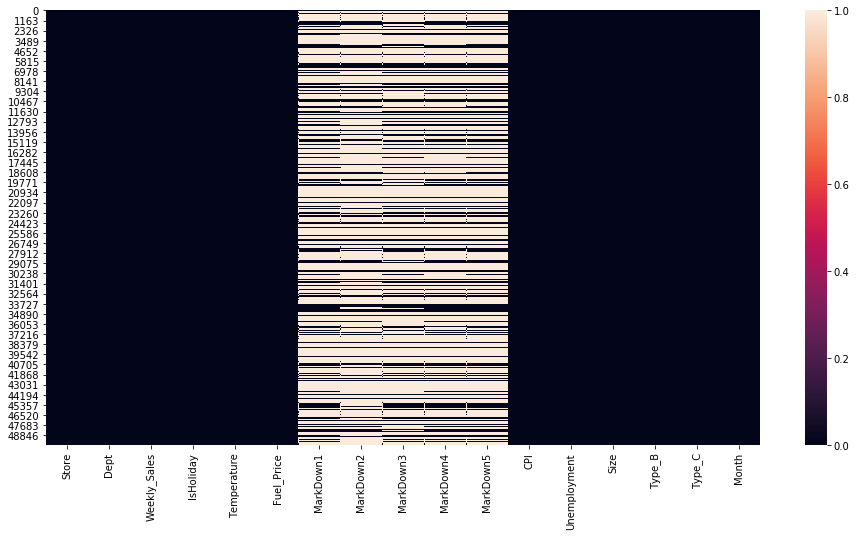

In [301]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isna())
plt.show()

In [302]:
df.fillna(value=0,inplace=True)

In [303]:
df.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
Type_B          0
Type_C          0
Month           0
dtype: int64

In [304]:
corr_df=corr_matrix['Weekly_Sales'].sort_values(ascending=False)
corr_df

Weekly_Sales    1.000000
Size            0.244659
Dept            0.152208
MarkDown1       0.088638
MarkDown5       0.080280
MarkDown4       0.046656
MarkDown3       0.041824
MarkDown2       0.031991
IsHoliday       0.007133
Temperature     0.000525
Fuel_Price     -0.001855
CPI            -0.014692
Unemployment   -0.029628
Store          -0.084292
Name: Weekly_Sales, dtype: float64

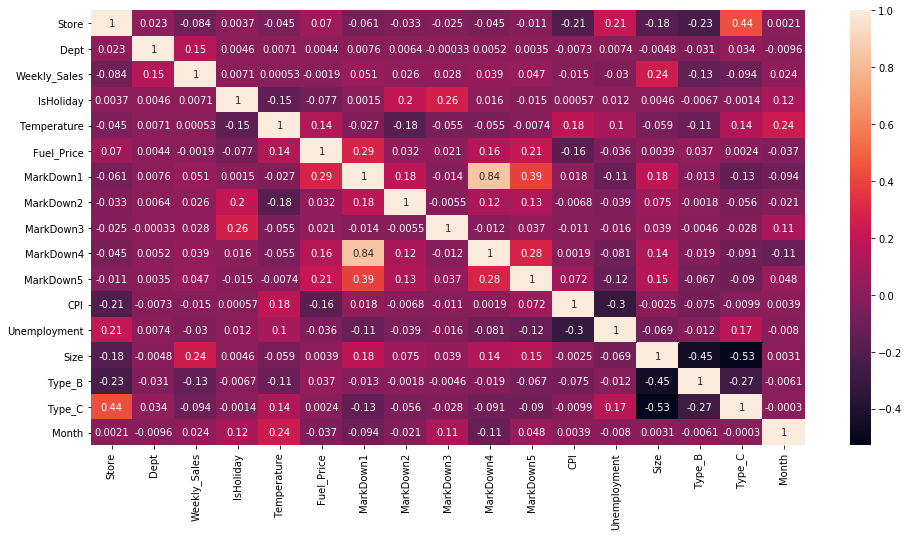

In [305]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [306]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'Month'],
      dtype='object')

In [307]:
len(df.columns)

17

In [308]:
df.drop(['CPI','Unemployment','Fuel_Price'],axis=1,inplace=True)

In [309]:
len(df.columns)

14

In [310]:
 X=df.drop(['Weekly_Sales'],axis=1).values#dot values is convert to array values

In [311]:
X.shape

(50000, 13)

In [312]:
Y=df['Weekly_Sales'].values

In [313]:
Y.shape

(50000,)

## split the data in train and test

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [316]:
x_train.shape

(40000, 13)

In [317]:
y_train.shape

(40000,)

In [318]:
from sklearn.linear_model import LinearRegression

In [319]:
Ir=LinearRegression()

In [320]:
Ir.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [321]:
y_pred=Ir.predict(x_test)

In [322]:
from sklearn.metrics import mean_squared_error

In [323]:
mse=mean_squared_error(y_test,y_pred)

In [324]:
mse

467469845.8547409

In [325]:
np.sqrt(mse)

21621.050988671686

In [326]:
from sklearn.model_selection import cross_val_score

In [327]:
cv_score=cross_val_score(Ir,x_train,y_train,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')

In [328]:
np.sqrt(-cv_score)

array([21200.46921164, 21550.39270591, 21564.09086849, 21409.22306736,
       21301.61246704])

## SGD

In [329]:
from sklearn.linear_model import SGDRegressor

In [330]:
sgd=SGDRegressor()

In [331]:
sgd.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [332]:
y_pred=sgd.predict(x_test)

In [333]:
sgd_error=mean_squared_error(y_test,y_pred)

In [334]:
sgd_error

5.104095835950691e+36

In [335]:
np.sqrt(sgd_error)

2.259224609451369e+18

## Test-set

In [336]:
test=pd.read_csv('test.csv')
test.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [337]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size',
       'Type_B', 'Type_C', 'Month'],
      dtype='object')

In [338]:
features=pd.read_csv('features.csv')
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [339]:
store=pd.read_csv('stores.csv')
store.head(4)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863


In [340]:
test=test.merge(store,how='left').merge(features,how='left')
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [341]:
test.shape

(115064, 15)

In [342]:
test.drop(['CPI','Unemployment','Fuel_Price'],axis=1,inplace=True)

In [343]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,1,2012-11-02,False,A,151315,55.32,6766.44,5147.70,50.82,3639.90,2737.42
1,1,1,2012-11-09,False,A,151315,61.24,11421.32,3370.89,40.28,4646.79,6154.16
2,1,1,2012-11-16,False,A,151315,52.92,9696.28,292.10,103.78,1133.15,6612.69
3,1,1,2012-11-23,True,A,151315,56.23,883.59,4.17,74910.32,209.91,303.32
4,1,1,2012-11-30,False,A,151315,52.34,2460.03,NaN,3838.35,150.57,6966.34


In [344]:
test.shape

(115064, 12)

In [345]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Store        115064 non-null  int64  
 1   Dept         115064 non-null  int64  
 2   Date         115064 non-null  object 
 3   IsHoliday    115064 non-null  bool   
 4   Type         115064 non-null  object 
 5   Size         115064 non-null  int64  
 6   Temperature  115064 non-null  float64
 7   MarkDown1    114915 non-null  float64
 8   MarkDown2    86437 non-null   float64
 9   MarkDown3    105235 non-null  float64
 10  MarkDown4    102176 non-null  float64
 11  MarkDown5    115064 non-null  float64
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 10.6+ MB


In [346]:
test.isna().sum()

Store              0
Dept               0
Date               0
IsHoliday          0
Type               0
Size               0
Temperature        0
MarkDown1        149
MarkDown2      28627
MarkDown3       9829
MarkDown4      12888
MarkDown5          0
dtype: int64

In [347]:
test.fillna(value=0,inplace=True)

In [348]:
test.isna().sum()

Store          0
Dept           0
Date           0
IsHoliday      0
Type           0
Size           0
Temperature    0
MarkDown1      0
MarkDown2      0
MarkDown3      0
MarkDown4      0
MarkDown5      0
dtype: int64

In [349]:
date=pd.to_datetime(test['Date'])

In [350]:
test['month']=date.dt.month

In [351]:
dummy=pd.get_dummies(test['Type'],drop_first=True,prefix='Type')

In [352]:
dummy.head()

,Type_B,Type_C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [353]:
test=pd.concat([test,dummy],axis=1)

In [354]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,month,Type_B,Type_C
0,1,1,2012-11-02,False,A,151315,55.32,6766.44,5147.70,50.82,3639.90,2737.42,11,0,0
1,1,1,2012-11-09,False,A,151315,61.24,11421.32,3370.89,40.28,4646.79,6154.16,11,0,0
2,1,1,2012-11-16,False,A,151315,52.92,9696.28,292.10,103.78,1133.15,6612.69,11,0,0
3,1,1,2012-11-23,True,A,151315,56.23,883.59,4.17,74910.32,209.91,303.32,11,0,0
4,1,1,2012-11-30,False,A,151315,52.34,2460.03,0.00,3838.35,150.57,6966.34,11,0,0


In [355]:
test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       'month', 'Type_B', 'Type_C'],
      dtype='object')

In [356]:
test.drop(['Type','Date'],axis=1,inplace=True)

In [357]:
test.columns

Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'month', 'Type_B',
       'Type_C'],
      dtype='object')

In [358]:
len(test.columns)

13

In [359]:
len(df.columns)

14

In [360]:
test_pred=sgd.predict(test)

In [361]:
test_pred

array([-6.71050284e+17, -6.95068484e+17, -7.55361455e+17, ...,
       -5.66386184e+17, -5.69762279e+17, -6.18073177e+17])

In [362]:
test_pred.shape

(115064,)

In [363]:
test.shape

(115064, 13)

## making submission csv

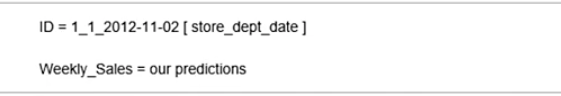

In [364]:
test=pd.read_csv('test.csv')

In [366]:
test.head(2)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False


In [370]:
Id=data['Store'].astype(str)+'_'+data['Dept'].astype(str)+'_'+data['Date'].astype(str)
Id[:2]

170581    18_24_2012-06-22
387488    41_55_2011-03-04
dtype: object

In [371]:
test_pred[:3]

array([-6.71050284e+17, -6.95068484e+17, -7.55361455e+17])

In [372]:
data={'Id':Id,'weekly_sales':test_pred}

In [374]:
data

{'Id': 170581    18_24_2012-06-22
 387488    41_55_2011-03-04
 309191    32_40_2011-08-12
 280399    29_25_2012-02-03
 380918    40_98_2012-06-29
                 ...       
 117577    12_98_2012-04-20
 17185      2_58_2010-05-14
 2042       1_16_2010-11-12
 83592      9_36_2012-02-24
 348731    37_17_2011-09-30
 Length: 50000, dtype: object,
 'weekly_sales': array([-6.71050284e+17, -6.95068484e+17, -7.55361455e+17, ...,
        -5.66386184e+17, -5.69762279e+17, -6.18073177e+17])}